/tmp/ipykernel_6777/258239292.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price_range = data.groupby('price_range')['rate_(out_of_5)'].mean()


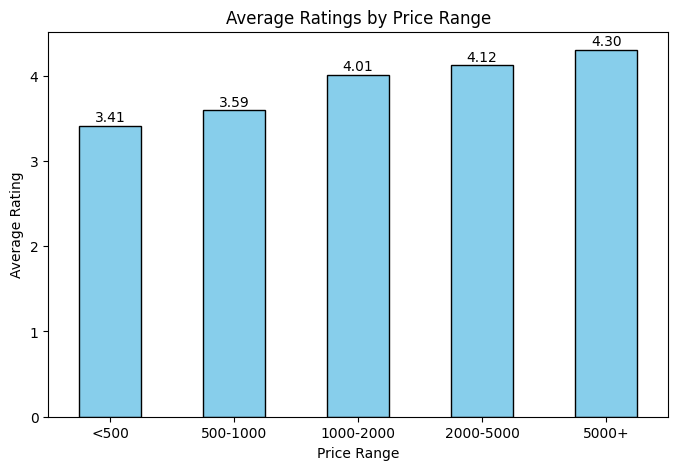

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(file_path):
    """Load and clean dataset."""
    try:
        data = pd.read_csv(file_path)
        # Standardize column names
        data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None

def preprocess_data(data):
    """Convert columns to proper types & clean invalid values."""
    # Convert avg cost & rating to numeric, handling errors
    data['avg_cost_(two_people)'] = pd.to_numeric(data['avg_cost_(two_people)'], errors='coerce')
    data['rate_(out_of_5)'] = pd.to_numeric(data['rate_(out_of_5)'], errors='coerce')
    
    # Drop NaN values
    data = data.dropna(subset=['avg_cost_(two_people)', 'rate_(out_of_5)'])
    
    return data

def categorize_price_ranges(data):
    """Group price ranges into bins for better visualization."""
    bins = [0, 500, 1000, 2000, 5000, np.inf]  # Define range bins
    labels = ['<500', '500-1000', '1000-2000', '2000-5000', '5000+']
    data['price_range'] = pd.cut(data['avg_cost_(two_people)'], bins=bins, labels=labels)
    return data

def calculate_average_rating_by_price_range(data):
    """Calculate average rating for each price range."""
    avg_rating_by_price_range = data.groupby('price_range')['rate_(out_of_5)'].mean()
    return avg_rating_by_price_range

def visualize_results(avg_rating_by_price_range):
    """Plot average ratings by price range."""
    plt.figure(figsize=(8, 5))
    avg_rating_by_price_range.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title("Average Ratings by Price Range")
    plt.xlabel("Price Range")
    plt.ylabel("Average Rating")
    plt.xticks(rotation=0)

    # Add values on top of bars
    for index, value in enumerate(avg_rating_by_price_range):
        plt.text(index, value + 0.05, f"{value:.2f}", ha='center')

    plt.show()

def main():
    file_path = "zomato.csv"
    data = load_data(file_path)

    if data is None:
        return

    data = preprocess_data(data)
    data = categorize_price_ranges(data)

    avg_rating_by_price_range = calculate_average_rating_by_price_range(data)
    visualize_results(avg_rating_by_price_range)

if __name__ == "__main__":
    main()
